In [1]:
# Paquetes para bases de datos y manipulación de matrices
import pandas as pd
import numpy as np
# Paquetes para graficar
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# Paquetes para estimar regresión
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Regresión Lineal Múltiple

## 1. Historia.

Las primeras aproximaciones al método de regresión lineal múltiple las realizaron Legendre (1805) y Gauss (1809). Desarrollaron un método de estimación para determinar las órbitas de cuerpos celestes alrededor del sol desarrollando el método de mínimos cuadrados. Sin embargo, Gauss sería quién profundizaría en esta teoría, realizando contribuciones tales como el teorema de Gauss-Markov, el cual demuestra que bajo ciertas condiciones, los estimadores de mínimos cuadrados son los *mejores estimadores lineales insesgados*.

Desde entonces se ha venido trabajando en torno a este planteamiento desde la estadística, determinando las propiedades y condiciones del problema y derivaciones del modelo.

Las aplicaciones de este modelo son diversas y cubren muchos campos. La idea central del planteamiento proviene de establecer una relación entre la variable de interés con sus covariables a partir de una aproximación lineal. Los usos van desde la descripción y cuantificación de una covariable sobre la variable de interés, hasta para realizar pronóstico (clasificación).


Fuente: [Wikipedia]("https://en.wikipedia.org/wiki/Regression_analysis#:~:text=The%20earliest%20form%20of%20regression,and%20by%20Gauss%20in%201809.&text=The%20term%20%22regression%22%20was%20coined,to%20describe%20a%20biological%20phenomenon.”).

### 1.1. El modelo

Sea $\mathbf{Y}' = [Y_1, Y_2, \dots, Y_n]$ un vector de variables aleatorias asociadas a algún fenómeno de interés en $\mathbb{R}$, $[\mathbf{X_1}, \dots, \mathbf{X_p}]$ los vectores de covariables de tamaño $n \times p$ en $\mathbb{R}^p$,  donde $X_{ip}$ es el elemento $i$ de la variable $p$; y $\mathbf{e}' = [\epsilon_1, \epsilon_2, \dots, \epsilon_n]$ es el vector de errores tales que $E(\epsilon_i) = 0, Var(\epsilon_i) = \sigma_{\epsilon}^2$ para todo $i = 1, \dots, n$ y $Cov(\epsilon_i,\epsilon_j) = 0$ para todo $i \neq j$.

De acuerdo con lo anterior, el modelo se define como:

$$Y_i = \beta_0 + \sum_{i=1}^{p}\beta_{i}*X_{i} + \epsilon_i$$

O en forma matricial:

$$
\mathbf{Y} = X\mathbf{B} + \mathbf{e}
$$



### 1.2. Supuestos del modelo

Para que esta relación sea válida, se asumen los siguientes enunciados:

1. **Linealidad en los parámetros:** El modelo supone que la relación es lineal en los parámetros, es decir que el modelo es de la forma y = ax + b, donde la potencia de a es igual a 1.
2. **Error de medición cero:** Las variables han sido medidas sin sesgos. 
3. **Rango completo:** La matriz de covariables es de rango $p < n$. Del mismo modo, la matriz de diseño $(X'X)$ es simétrica y de rango p, y por lo tanto, invertible. 
4. **No multicolinealidad:** Todas las columnas de la matriz $X$ son linealmente independientes, es decir, no existen columnas que sean combinaciones lineales de las demás.
5. **Normalidad del vector de errores:** El vector $\mathbf{\epsilon}$ se distribuye normal multivariado con media cero y matriz de varianzas y covarianzas diagonal, es decir:

$$
\mathbf{\epsilon} \sim N\left(\mathbf{0}, \sigma^2 I_p\right)
$$

Bajo estos supuestos, se plantea encontrar el vector de parámetros $\widehat{\mathbf{B}}$, el cual minimiza la siguiente función de pérdida:

$$
\widehat{\mathbf{B}} = \underset{\mathbf{B} \in \mathbb{R}^p}{\arg} \max (\mathbf{Y} - X\mathbf{B})'(\mathbf{Y} - X\mathbf{B})
$$

De la cual se desprende su solución con base en las ecuaciones normales:

$$
 (X'X)\mathbf{B} = X'\mathbf{Y}
$$

Puesto que la matriz de diseño es de rango completo, el sistema de ecuaciones tiene solución única:

$$
\widehat{\mathbf{B}} = (X'X)^{-1} X'\mathbf{Y}
$$

Este método de estimación se denomina **mínimos cuadrados ordinarios**. De acuerdo con los supuestos anteriores, estos estimadores son los mejores estimadores lineales, insesgados y de varianza mínima. 


## 2. Caso práctico

A continuación realizamos un ejercicio de estimación con datos reales. La base utiizada es la **Real estate price prediction**, la cual se encuentra disponible en el [sitio web](https://www.kaggle.com/) de Kaggle. Esta base contiene 414 registros de precios de unidades residenciales y algunas covariables que determinan las características de la vivienda.

In [2]:
#1. Cargar datos

real_state_df = pd.read_csv("./tarea_2/real_state.csv", sep = ",", header=0, decimal = ".", index_col = 0)
real_state_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Las variables de la base son:

* Y house price of unit area:
* X1: Fecha 
* X2: Antigüedad de la casa
* X3: Distancia a la estación de metro más cercana
* X4: Número de tiendas cercanas
* X5: Latitud
* X6: Longitud

Y el modelo a plantear será el siguiente:

$$
Y_i = \beta_0 + \beta_2*X2_{i2} + \beta_3*X_{i3} + \beta_4*X_{i4} + \epsilon_{i}
$$

Donde el subíndice de los coeficientes tiene correspondencia con el nombre de la variable.

## 2. Estimación
### 2.1 Descripción de los datos

In [47]:
base = real_state_df[col_names[[1,2,3,6]]]
base.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


1. Observamos que el precio de las viviendas es bastante asimétrico. El valor mímimo se encuentra en 7.6, el promedio en 37.9 y el 50% de las viviendas se acumula en 27.7.
2. Las viviendas tienen una antiguedad promedio de 17.7 años. El 50% de las viviendas se encuentran concentradas en 16.1 años de antigüedad.
3. La distancia también es muy variada y asimétrica. en promedio están en 1083 pies, sin embargo hay lugares que están desde 23.38 pies hasta 6448 pies. Además tiene muchos valores atípicos.
4. En promedio, se encuentran 4 tiendas alrededor de cada vivienda.

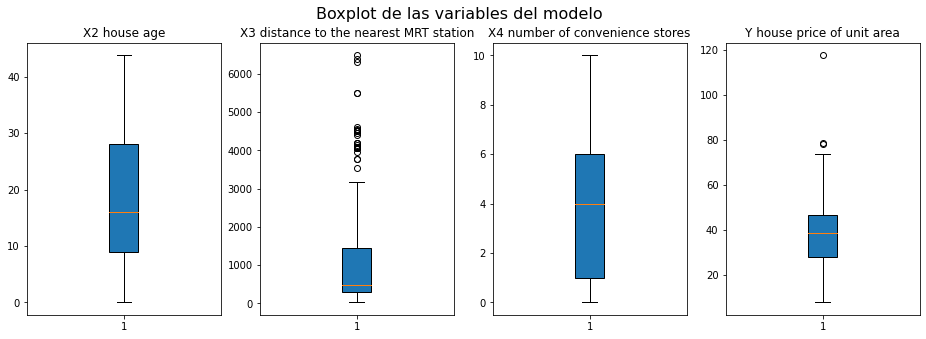

In [88]:
fig, ax = plt.subplots(1,4, figsize=(16, 5))

fig.suptitle("Boxplot de las variables del modelo", fontsize=16)
# Parámetros para graficar boxplot
base_names = base.columns

for k in range(0,4):
    ax[k].boxplot(base[base_names[k]],
                         vert=True,  # vertical box alignment
                         patch_artist=True)  # fill with color
    ax[k].set_title(base_names[k])


### 2.2. Estimación
#### 2.2.1 Cálculos con objetos matriciales

A continuación se realiza la estimación de los coeficientes usando métodos matriciales. Adicionalmente se estiman otros estadísticos tales como la matriz de varianzas y covarianzas de $B$, algunas métricas necesarias para calcular la bondad de ajuste del modelo y los estadísticos t de las pruebas de hipótesis nulas.

In [42]:
### Método 1: Por matrices:

col_names = real_state_df.columns
X  = np.c_[ np.ones(shape=real_state_df.shape[0]) ,  real_state_df[col_names[[1,2,3]]].to_numpy()]
Y = real_state_df[col_names[[6]]].to_numpy()

from numpy import linalg as lin

# Estimación de coeficientes
D     = np.matmul(X.T, X )         # Matriz de diseño (X'X)
D_inv = lin.inv(D)
XY    = np.matmul(X.T, Y)            # Producto X'Y
B     = np.matmul(D_inv,XY)          # Vector de coeficientes

# Estimación de vector de errores, SRC, matriz de varianzas y covarianzas 
n, k    = X.shape                               # Parámetros.
Y_hat   = np.matmul(X,B)                        # Vector de estimados.
e       = Y - Y_hat                             # Vector de errores.
SRC     = np.matmul(e.T,e)                      # Suma de residuos al cuadrado.
sigma_e = SRC/(n - k)                           # varianza de errores.
VAR_B   = sigma_e*D_inv                         # Matriz de varianzas y covarianzas.
SST     = np.matmul(Y.T, Y)                     # Suma total de cuadrados.
SSR     = np.matmul(Y_hat.T, Y_hat)             # Suma explicada de cuadrados.
R_2     = 1 - SRC/SST                           # R^2 del modelo. 
b       = B.T.tolist()[0]                       # Array apropiado para calcular estadísticos t
t_stats = np.divide(b, np.sqrt(np.diag(VAR_B))) # Vector de estadísticos t-student de significancia individual

# imprimir objetos
print("Matriz de varianzas y covarianzas:\n", VAR_B)
print("\n")
print("Vector de coeficientes:\n", B)
print("\n")
print("Varianza del error:\n", sigma_e)
print("\n")
print("R^2:", R_2)
print("\n")
print("estadístico t:", t_stats)

Matriz de varianzas y covarianzas:
 [[ 1.91695762e+00 -2.45180616e-02 -4.17974101e-04 -2.00994045e-01]
 [-2.45180616e-02  1.60843743e-03 -1.26508161e-06 -6.35112569e-04]
 [-4.17974101e-04 -1.26508161e-06  2.05238135e-07  5.32282506e-05]
 [-2.00994045e-01 -6.35112569e-04  5.32282506e-05  3.77485385e-02]]


Vector de coeficientes:
 [[ 4.29772862e+01]
 [-2.52855827e-01]
 [-5.37912962e-03]
 [ 1.29744248e+00]]


Varianza del error:
 [[85.58764014]]


R^2: [[0.94790959]]


estadístico t: [ 31.04078761  -6.30479369 -11.87361546   6.67787124]


#### 2.2.2 Librería sklearn

Ahora usamos la librería sklearn para la estimación del modelo.

In [86]:
# Método 2: Paquete sklearn

regr = linear_model.LinearRegression()  # Objeto sklearn-regresión
regr.fit(X, Y)                          # Estimar regresión lineal

# Obtener outputs del modelo:
Y_hat_reg      = regr.predict(X)                 # Vector de estimados
reg_coef       = regr.coef_                      # Coeficientes de regresión 
reg_coef[0][0] = regr.intercept_                 # Intercepto del modelo
mse_reg        = mean_squared_error(Y,Y_hat_reg) # error cuadrático medio
r2_reg         = r2_score(Y, Y_hat_reg)

# Imprimir resultados del modelo:

print("Vector de coeficientes:\n", reg_coef)
print("\n")
print("Error cuadrático medio:\n", mse_reg)
print("\n")
print("R^2:", r2_reg)


Vector de coeficientes:
 [[ 4.29772862e+01 -2.52855827e-01 -5.37912962e-03  1.29744248e+00]]


Error cuadrático medio:
 84.76070642266241


R^2: 0.5410632980005725


#### 2.2.3 Librería statsmodels

La librería statsmodels ofrece un módulo para la estimación del modelo de regresión lineal. Además de los coeficientes calculados en 1 y 2, encontramos también estadísticos asociados a pruebas ANOVA y demás pruebas para validar los supuestos distribucionales.

In [150]:
# Método 3: Paquete statsmodel
import statsmodels.api as sm
X_ = sm.add_constant(real_state_df[col_names[[1,2,3]]].to_numpy())
model = sm.OLS(Y, X_)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           5.44e-69
Time:                        15:58:52   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9773      1.385     31.041      0.0

## 3. Gráficos

A continuación mostramos los resultados de estimación del modelo. Graficamos el hiperplano de estimación de acuerdo a combinaciones de 2 covariables. Observamos en este caso que las variables **X2** y **X3** tienen una relación negativa con el precio de las unidades residenciales, de donde se concluye que si la distancia a la estación de MRT más cercana es más grande, el precio de la vivienda será menor (en promedio). La misma interpretación ocurre para la antigüedad de la unidad residencial: mientras más antigua sea la casa, su precio será menor. 

Por otro lado, se observa que la variable **X4** exhibe una relación lineal positiva: Mientras más tiendas se ubiquen alrededor de la unidad, su precio de vivienda será mayor.

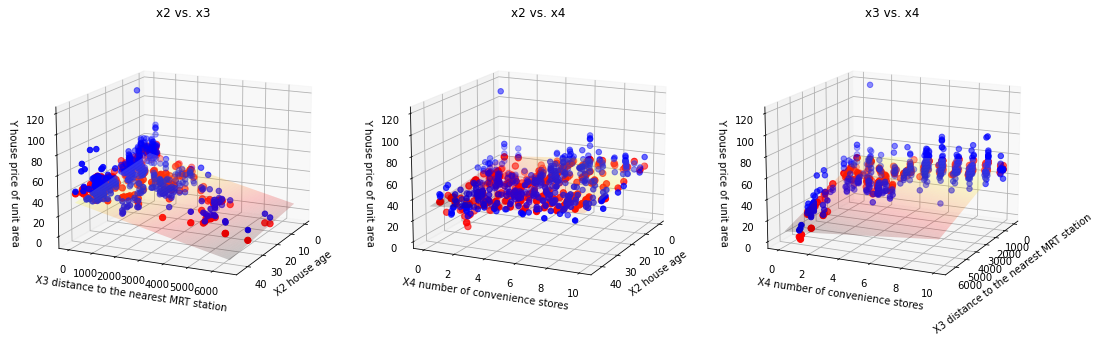

In [261]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Combinaciones de variables a graficar:
var_comb       = [[0,1,2],[1,1,3],[2,2,3]]
col_names_plot = col_names[[6,1,2,3]]

# Gráfico:
fig = plt.figure(figsize=(18,18))
# fig.suptitle('Resultados de la estimación', fontsize=16)

for var in var_comb:
    #var = [0,1,2]
    #fig, ax = plt.subplots(1,3, figsize=(5, 5))
    a , i , j = var  
    # set up a figure twice as wide as it is tall
    #fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 3, a+1, projection='3d'  )

    # Parámetros de delimitación del gráfico
    min_x1 = np.min(X[:,i]) ; max_x1 = np.max(X[:,i])  
    min_x2 = np.min(X[:,j]) ; max_x2 = np.max(X[:,j]) 
    min_y  = np.min([ np.min(Y), np.min(Y_hat)]) ; max_y = np.max( [np.max(Y), np.max(Y_hat)])

    # Gráfico
    # Creamos una malla, sobre la cual graficaremos el plano
    x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1),  np.linspace(min_x2, max_x2))

    # calculamos los valores del plano para los puntos x e y
    nuevox1 = (reg_coef[0][i] * x1)
    nuevox2 = (reg_coef[0][j] * x2) 

    # calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
    y = (nuevox1 + nuevox2 + reg_coef[0][0])

    # Graficamos el plano
    ax.plot_surface(x1, x2, y, alpha=0.2, cmap='hot')

    # Graficamos en azul los puntos en 3D
    ax.scatter(X[:,i], X[:,j], Y, c='blue',s=30)

    # Graficamos en rojo, los puntos que 
    ax.scatter(X[:,i], X[:,j], Y_hat, c='red',s=40)

    # con esto situamos la "camara" con la que visualizamos
    ax.view_init(elev=15., azim=25)

    ax.set_xlabel(col_names_plot[i])
    ax.set_ylabel(col_names_plot[j])
    ax.set_zlabel(col_names_plot[0])
    ax.set_title( "x" + str(i+1) + " vs. " + "x" + str(j+1))
    


## 4. Conclusiones.

El modelo de regresión lineal múltiple permite realizar trabajos de clasificación de datos asumiendo que existe relaciones lineales entre una variable de interés y un conjunto de covariables. Bajo algunos supuestos, la estimación se lleva a cabo por el método de mínimos cuadrados de los parámetros por mínimos cuadrados ordinarios genera estimadores lineales, insesgados y de varianza mínima. Observamos que el modelo fue estimado 